Wine, Breast cancer, BMI 20000 데이터를 SVM 분류로 학습한다

# Support Vector Machine

**SVM**(Support Vector Machine)은 개체를 분류하는 중요한 기술이다. SVM의 모습은 2차원 또는 3차원 공간에 각각의 개체가 위치하고, 선을 그어 분류하기 위해 선을 구성하는 매개변수를 조정해 이를 기반으로 패턴을 인식한다.

<img src='https://i.imgur.com/E7HrgBu.jpeg' width=600>


## SVM이란?


SVM은 일반적으로 분류 문제에서 사용됩니다. 서로 반대되는 두 클래스의 가장 가까운 데이터 포인트 사이의 마진을 최대화하는 최적의 초평면을 찾아 두 클래스를 구분합니다. 

아래 그래프에서 두 종류 데이터를 구분하는 구분선을 그을 때, 여러가지 구분선이 나올 수 있는데 가장 중간이 적당할 것이다. 이 중간을 지나는 선을 결정할 때 오른쪽 그래프 같이 중간과 가까운 선의 거리(마진)을 최대로 만드는 것이 가장 좋다.

<img src='https://velog.velcdn.com/images/shlee0125/post/491447d4-c07b-416d-a27d-b79a240b7746/image.png' width=500>

이것이 svm의 특징인 마진 최대화라고 한다. 이런 svm 특징을 이용하면 알 수 없는 패턴도 제대로 분류할 확률이 괭장히 높다고 한다. 이를 학습 이론에서 **일반환 능력** 이라고 한다.

In [3]:
import pandas as pd
import numpy as np

Text(0.5, 1.0, '한글 타이틀...')

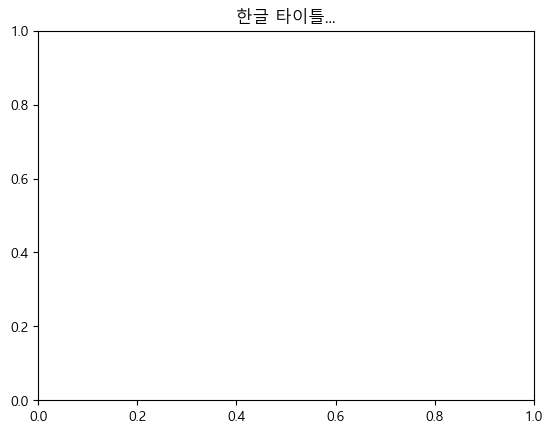

In [1]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

# 1. 와인데이터 학습하기

In [4]:
# scikit 의 load_wine
from sklearn.datasets import load_wine
wine=load_wine()
df_wine=pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine['target']=wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# wine 데이터의 feature, target로 Dataframe을 만든다.

# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
labels=[wine['target_names'][i] for i in wine.target]

In [ ]:
# target에 class 이름 매핑 



[np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0'),
 np.str_('class_0')]

In [ ]:
# class 필드



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [6]:
df_wine['class']=labels
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# class 별 개수




(target,)
1            0.398876
0            0.331461
2            0.269663
Name: count, dtype: float64

In [9]:
# 데이터세트에서 훈련데이터와 타겟데이터 분리 

X=df_wine.drop(['target','class'],axis=1)
y=wine.target

In [35]:
X.shape, y.shape

((178, 13), (178,))

In [10]:
# 학습 데이터 분리 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=50)

In [37]:
X_train.shape, y_train.shape

((119, 13), (119,))

SVM(Support Vector Machine) 알고리즘으로 학습 수행후 정확도를 확인한다.

In [16]:
# svm 모듈
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVC
svc=SVC()

In [ ]:
# SVC 학습
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print('정답률 :', svc.score(X_test,y_test))
print('정답률2 :', accuracy_score(y_test,pred))

print('MAE :',mean_absolute_error(y_test,pred))
print('MSE :',mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,pred)))
print('R2 :',mean_absolute_error(y_test,pred))


정답률 : 0.6481481481481481
정답률2 : 0.6481481481481481
MAE : 0.35185185185185186
MSE : 0.35185185185185186
RMSE : 0.5931710140017395
R2 : 0.35185185185185186


In [20]:
print('report :',classification_report(y_test, pred))

report :               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.55      0.96      0.70        23
           2       0.00      0.00      0.00        15

    accuracy                           0.65        54
   macro avg       0.49      0.59      0.52        54
weighted avg       0.51      0.65      0.55        54



c:\Users\ksa\stenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ksa\stenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ksa\stenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# X_test 예측




In [ ]:
# X_test 의 평가 점수 Result



print("정답률: ", ac_score)
print("리포트 = \n", cl_report)


정답률:  0.6440677966101694
리포트 = 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.56      0.96      0.70        26
           2       0.00      0.00      0.00        17

    accuracy                           0.64        59
   macro avg       0.49      0.59      0.52        59
weighted avg       0.50      0.64      0.55        59



/home/qkboo/micromamba/envs/ML_P312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/qkboo/micromamba/envs/ML_P312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/qkboo/micromamba/envs/ML_P312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

### 정규화 후 학습

스케일러 처리한 데이터로 처리.

In [ ]:
from sklearn.preprocessing import StandardScaler 





array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [19]:
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=.33,random_state=50)

In [ ]:
# 학습 데이터




,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
# 훈련데이터, 테스트 데이터 분할
svc1=SVC()
svc1.fit(X_train,y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
pred1=svc.predict(X_test)
print('정답률 :', svc.score(X_test,y_test))
print('정답률2 :', accuracy_score(y_test,pred1))

print('MAE :',mean_absolute_error(y_test,pred1))
print('MSE :',mean_squared_error(y_test,pred1))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,pred1)))
print('R2 :',r2_score(y_test,pred1))

정답률 : 0.4406779661016949
정답률2 : 0.4406779661016949
MAE : 0.559322033898305
MSE : 0.559322033898305
RMSE : 0.7478783550139053
R2 : 0.559322033898305


c:\Users\ksa\stenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\ksa\stenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# 예측

# Result



print("Scaled 정답률: ", ac_score)
print("리포트 = \n", cl_report)

Scaled 정답률:  0.9830508474576272
리포트 = 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        17

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



# 2. BMI 학습하기

이전 학습에서 생성한 BMI 지표 가상 데이터 20000개를 학습해 보자

In [24]:
# 키,몸무데,bmi 데이터
tbl = pd.read_csv('./data/bmi20000.csv')
tbl

,height,weight,label
0,164,70,fat
1,182,60,thin
2,186,74,normal
3,120,99,fat
4,189,69,normal
...,...,...,...
19995,154,67,fat
19996,131,42,normal
19997,158,99,fat
19998,145,66,fat


In [27]:
# 학습데이터와 라벨

# 키, 몸무게, bmi 데이터
# tbl = pd.read_csv('./data/bmi20000.csv')
# tbl
from sklearn.preprocessing import LabelEncoder

# X, y 분리
X = tbl.drop(['label'], axis=1)
y = tbl['label']

# 라벨 인코딩 (fat, normal, thin → 0, 1, 2)
le = LabelEncoder()
y = le.fit_transform(y)

# train/test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM 분류 모델 생성 및 학습
svc = SVC()
svc.fit(X_train, y_train)

# 예측
pred = svc.predict(X_test)

# 평가
print('정답률:', accuracy_score(y_test, pred))
print('\nClassification Report:\n')
print(classification_report(y_test, pred, target_names=le.classes_))

정답률: 0.99

Classification Report:

              precision    recall  f1-score   support

         fat       1.00      0.99      1.00      3179
      normal       0.97      0.99      0.98      1485
        thin       0.99      0.98      0.99      1336

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [ ]:
%%time

# 학습 데이터와 테스트 데이터로 나누기


# 학습하기




CPU times: user 631 ms, sys: 239 ms, total: 870 ms
Wall time: 863 ms


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
#예측하기


#결과


print("정답률 =", ac_score)
print("리포트=\n", cl_report)

정답률 = 0.992
리포트=
               precision    recall  f1-score   support

         fat       0.98      1.00      0.99      1432
      normal       1.00      1.00      1.00      1927
        thin       1.00      0.98      0.99      1641

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



기계가 BMI를 모르는 상태에서도 약 99% 확률로 분류하고 있다.

### 표준화로 처리

array([[-1.48734334, -1.10058971],
       [-1.65840385,  0.18147207],
       [ 0.99303406, -0.04477412],
       [-1.05969207,  1.53894925],
       [ 0.09496638, -1.5530821 ]])

In [31]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=50)
clf=SVC()
clf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
X_std.min(),X_std.max()

(np.float64(-1.7035770495824603), np.float64(1.7121758556377318))

In [35]:
pred2=clf.predict(X_test)
print('정답률 :', clf.score(X_test,y_test))
print('정답률2 :', accuracy_score(y_test,pred2))

print('MAE :',mean_absolute_error(y_test,pred2))
print('MSE :',mean_squared_error(y_test,pred2))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,pred2)))
print('R2 :',r2_score(y_test,pred2))

정답률 : 0.9938333333333333
정답률2 : 0.9938333333333333
MAE : 0.006166666666666667
MSE : 0.006166666666666667
RMSE : 0.07852812659593164
R2 : 0.9906302827320627


In [ ]:
# 훈련데이터, 테스트 데이터 분할


# 학습하기



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# 예측



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Result


print("Scaled 정답률: ", ac_score)
print("리포트 = \n", cl_report)

Scaled 정답률:  0.997
리포트 = 
               precision    recall  f1-score   support

         fat       0.99      1.00      0.99      1467
      normal       1.00      1.00      1.00      1958
        thin       1.00      1.00      1.00      1575

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



### Max 값 정규화

데이터 정규화를 위해 기준 값으로 하기도 한다.
 - 몸무게 100kg
 - 크 200cm

In [39]:
W=tbl['weight']/100
H=tbl['height']/200
W[:3],H[:3]

(0    0.70
 1    0.60
 2    0.74
 Name: weight, dtype: float64,
 0    0.82
 1    0.91
 2    0.93
 Name: height, dtype: float64)

In [40]:
X=pd.concat([W,H],axis=1)

In [ ]:
#칼럼 자르고 정규화 하기
 #최대 100kg이라고 가정
  #최고 200cm라고 가정





,weight,height
0,0.43,0.625
1,0.60,0.605
2,0.57,0.915
3,0.78,0.675
4,0.37,0.810
...,...,...
19995,0.53,0.825
19996,0.45,0.680
19997,0.52,0.640
19998,0.76,0.935


# 3. SVM의 종류

scikit-learn 은 세 가지 종류의 SVM을 지원한다. **SVC, NuSVC, LinearSVC** 이다. 

SVC, NuSVC는 표준적으로 구현한 SVM이다. 오류 처리 방법이 약간 다르지만 수학적으로 같다. LinearSVC 는 선형 커널 특화된 SVM으로 계산이 빠르며 다양한 옵션을 가지고 있다.

앞서 bmi 코드에서 LinearSVC 로 구현해보면, 정답률은 조금 떨어지지만 실행 시간이 뚝 떨어지는 것을 알 수 있다.

In [44]:
# 2. X, y 분리
X = tbl.drop(['label'], axis=1)
y = tbl['label']

# 3. 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(y)

# 4. train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=50)

# 5. 학습
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# 6. 예측, 평가
from sklearn.metrics import accuracy_score, classification_report
pred = clf.predict(X_test)
print('정답률 :', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=le.classes_))

정답률 : 0.9537878787878787
              precision    recall  f1-score   support

         fat       0.95      1.00      0.97      3495
      normal       1.00      0.82      0.90      1639
        thin       0.93      1.00      0.96      1466

    accuracy                           0.95      6600
   macro avg       0.96      0.94      0.94      6600
weighted avg       0.96      0.95      0.95      6600



In [ ]:
%%time

# 학습 데이터와 테스트 데이터로 나누기


# 학습하기


#예측하기


#결과


print("정답률 =", ac_score)
print("리포트=\n", cl_report)

정답률 = 0.9232
리포트=
               precision    recall  f1-score   support

         fat       1.00      0.74      0.85      1460
      normal       0.90      1.00      0.95      1926
        thin       0.91      1.00      0.95      1614

    accuracy                           0.92      5000
   macro avg       0.94      0.91      0.92      5000
weighted avg       0.93      0.92      0.92      5000

CPU times: user 94.8 ms, sys: 3.84 ms, total: 98.6 ms
Wall time: 92.6 ms


# 4. 암 데이터 학습하기

In [46]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 데이터 불러오기
cancer = load_breast_cancer()

# DataFrame으로 변환
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [47]:
labels=[cancer['target_names'][i] for i in cancer.target]
df_cancer['class']=labels
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

array([0, 1])

In [ ]:
# 데이터 확인





,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# class 에 target_name 할당




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [48]:
X=df_cancer.drop(['target','class'],axis=1)
y=df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=50)
clf_svm=SVC(kernel='rbf') # default:rbf
clf_svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [51]:
pred3=clf_svm.predict(X_test)
print('정답률 :', clf_svm.score(X_test,y_test))
print('정답률2 :', accuracy_score(y_test,pred3))

print('MAE :',mean_absolute_error(y_test,pred3))
print('MSE :',mean_squared_error(y_test,pred3))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,pred3)))
print('R2 :',r2_score(y_test,pred3))

정답률 : 0.9361702127659575
정답률2 : 0.9361702127659575


ValueError: could not convert string to float: np.str_('benign')

In [ ]:
# class 와 target 의 항목




array([np.str_('malignant'), np.str_('benign')], dtype=object)

array([0, 1])

In [ ]:
# 학습 데이터, 라벨 분할




#### 학습

In [ ]:
# 훈련데이터, 테스트 데이터 분할



In [ ]:
# 학습하기




,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# X_test 예측



In [ ]:
# Result


print("Scaled 정답률: ", ac_score)
print("리포트 = \n", cl_report)

Scaled 정답률:  0.9361702127659575
리포트 = 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90        67
           1       0.92      0.99      0.95       121

    accuracy                           0.94       188
   macro avg       0.95      0.91      0.93       188
weighted avg       0.94      0.94      0.93       188



#### 정규화 후 학습

In [52]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 데이터 로드 및 DataFrame 변환
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정트리 분류기
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
pred = clf.predict(X_test)

print('[와인 데이터]')
print('정답률:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=wine.target_names))


[와인 데이터]
정답률: 0.9629629629629629
              precision    recall  f1-score   support

     class_0       0.95      0.95      0.95        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 데이터 로드 및 DataFrame 변환
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정트리 분류기
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
pred = clf.predict(X_test)

print('\n[유방암 데이터]')
print('정답률:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=cancer.target_names))



[유방암 데이터]
정답률: 0.9415204678362573
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        63
      benign       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# StandarScaler 사용 정규화 진행




In [77]:
test_size

0.33

In [ ]:
# 훈련데이터, 테스트 데이터 분할




In [ ]:
# 학습하기




,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# X_test 예측




In [ ]:
# Result



print("Scaled 정답률: ", ac_score)
print("리포트 = \n", cl_report)

Scaled 정답률:  0.9680851063829787
리포트 = 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



# "실습" 

와인 데이터와 암 데이터를 DecisionTree 로 분류해보자

In [87]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [88]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant
